# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Грыщенко Сергей Вячеславович. Вариант №6

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

Статистические данные: $(Y,z), Y-наблюдение,z-ковариата$

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y\mid z)=x(z)^\intercal\beta$

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y\mid z)=x(z)^\intercal\beta$

Статистическая модель: $\mathbb{E}_{\theta}(Y\mid z)=X^\intercal\beta,\space Var(Y|z) = \sigma^2E$

Альтернативная форма записи модели линейной регрессии: $Y = X^\intercal\beta + \varepsilon=\beta_0+\beta_1 x+\varepsilon, \space\mathbb{E}_{\theta}\varepsilon = 0,\space Var_{\theta}\varepsilon = \sigma^2E$

Метод наименьших квадратов: $RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

Нормальные уравнения: $XX^\intercal\beta=XY$

Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

    Оценивание параметра дисперсии, ДНО функции параметра

Оценка параметра $\sigma^2$: $S^2 =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$, $\space S^2$-несмещенная оценка дисперсии

Линейная функция параметра: $\psi(\beta) = C^\intercal\beta$

Будем говорить, что $\psi(\beta)$ допускает несмещенное оценивание, если $\exists L(Y) = B Y : \forall \beta : \mathbb{E}_\beta L(Y) = C^\intercal\beta$

Теорема Гаусса-Маркова: В модели линейной регрессии любая ДНО-функция параметра $\psi(\beta) = C^\intercal\beta$, $C = (c_1, \dots, c_m)^\intercal$ имеет НРМД - оценку $\hat{\psi}$. Эта оценка единственна в классе линейных несмещенных оценок и равна $\hat{\psi} = \sum_{i = 1}^{m}c_i\hat{\beta}_i$, где $\hat{\beta}$ - произвольное решение системы нормальных уравнений.

    Доверительное оценивание

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

    Проверка гипотез

Основная гипотеза $H_0:\psi=0$

F-cтатистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$, где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, где $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы, $SS_e=RSS(\hat{\beta})$


## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X
. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Результаты статистического эксперимента:

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from scipy.stats import t,f,norm,kstest
y=np.array([23.98,3.17,21.94,1.22,4.96,14.75,10.86,5.76,2.70,0.86,3.72,3.89,4.56,0.33,14.25,3.00,5.40,6.35,11.10,2.83,9.80,10.05,8.22,16.99,1.39,0.25,17.00,20.80,
   10.23,7.35,3.95,19.49,3.56,12.93,9.36,7.48,14.66,15.44,20.44,20.24,20.80,1.09,10.58,10.94,5.87,1.20,9.15,7.99,0.30,14.85])
x=np.array([6,1,0,2,1,0,3,4,3,8,8,3,3,6,8,7,4,2,8,0,1,8,6,5,3,4,7,4,4,4,4,4,7,0,3,0,5,7,1,5,4,6,0,7,6,7,4,0,1,1])
alpha=0.2

$\alpha=0.20; h=2.80.$ 

### 1. Построить графически результаты эксперимента. Сформулировать линейную регерессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

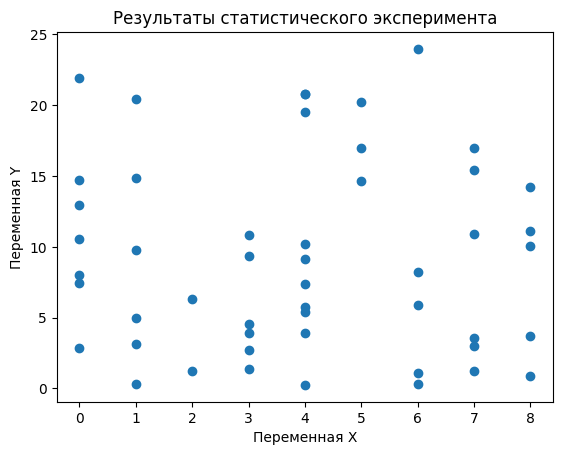

In [131]:
plt.scatter(x, y)
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Результаты статистического эксперимента')
plt.show()

Линейную регрессионную модель переменной Y по переменной X можно сформулировать в следующем виде:

$Y=X^T\beta+\varepsilon=\beta_0+\beta_1x+\varepsilon$

In [132]:
X = np.vstack([np.ones_like(x),x]) #приведем матрицу к виду [[1,1,...,1][x1,x2,...,x50]
transposed_X = X.T
result = np.dot(X, transposed_X)
determinant = np.linalg.det(result)
print('Определитель X*X^T:',determinant)#найдем определитель, чтобы убедиться,что у матрицы есть обратная
Y = y.reshape(50, 1)
beta=np.dot(np.dot(np.linalg.inv(result),X),Y)#(X*X^T)^(-1)*X*Y
beta_0=beta[0];
beta_1=beta[1];
print('beta_0:',beta_0)
print('beta_1:',beta_1)

Определитель X*X^T: 16824.99999999999
beta_0: [9.53665736]
beta_1: [-0.09642496]


$\widehat{\beta_0}=9.53665736;\widehat{\beta_1}=-0.09642496$

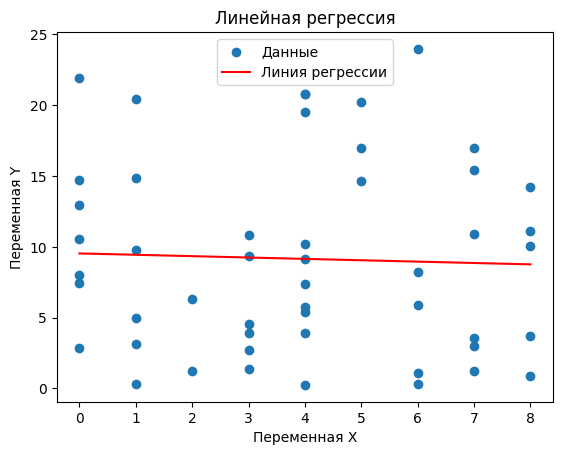

In [133]:
x_values = np.linspace(min(x), max(x), 100)

y_values = beta_0 + beta_1 * x_values

plt.scatter(x, y, label='Данные')
plt.plot(x_values, y_values, color='red', label='Линия регрессии')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

Построенная оценка не соответствует полученным данным

### 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Найдем несмещенную оценку дисперсии по формуле: $ s^2=\frac{RSS(β)}{n-r} $

,где $RSS(β)=\sum_{i=1}^{50}\left( Y_i -\beta_0-\beta_1X_i\right)^2$ 

In [134]:
mistakes=y - beta_0 - beta_1*x
RSS = np.sum((mistakes)**2)
r=np.linalg.matrix_rank(X);
n=len(x)
s=RSS/(n-r)
print('s:',s)

s: 46.61819544229817


[-9.14023239 -6.34023239 -3.54023239 -0.74023239  2.05976761  4.85976761
  7.65976761 10.45976761 13.25976761 16.05976761]


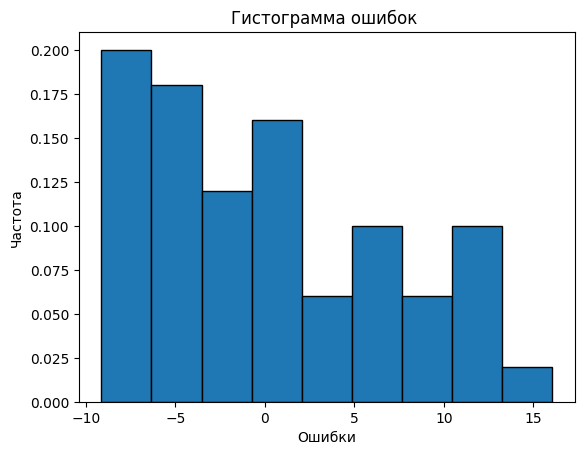

In [135]:
h = 2.8
bin=np.arange(np.min(mistakes), np.max(mistakes) + h, h)
print(bin)
weights = [1/(len(mistakes)) for _ in mistakes]
plt.hist(mistakes, bins=bin, edgecolor='black',weights =weights)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()

Выделим новые интервалы,чтобы в каждый попадало не менее 5 ошибок:

$I_1=(-\infty ;-6.34023239];I_2=(-6.34023239 ;-3.54023239 ];I_3=(-3.54023239  ;-0.74023239];$

$I_4=(-0.74023239;2.05976761 ];I_5=(2.05976761;7.65976761];I_6=(7.65976761;\infty)$

Абсолютные частоты:
$\nu_1=10;\nu_2=9;\nu_3=6;\nu_4=8;\nu_5=8;\nu_6=9$


Ожидаемые частоты $np_0i$: $np_{01}=22.295;np_{02}=1.191;np_{03}=1.196;np_{04}=1.197;np_{05}=2.381;np_{06}=21.737$

$\chi^2 \approx 136.67$

$x_{\alpha} \approx 5.99$

$\chi^2 > x_{\alpha_2}$ значит гипотеза отвергается

In [136]:
k_statistic, p_value = kstest(mistakes, 'norm')
x_alpha=ss.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes))
print('Статистика Колмогорова:',k_statistic)
print('x_alpha:',x_alpha)

Статистика Колмогорова: 0.44414521083849356
x_alpha: 0.1517096432224198


$\widehat{D_n} > x_{\alpha}$ значит гипотеза отвергается

[-9.14023239 -6.34023239 -3.54023239 -0.74023239  2.05976761  4.85976761
  7.65976761 10.45976761 13.25976761 16.05976761]


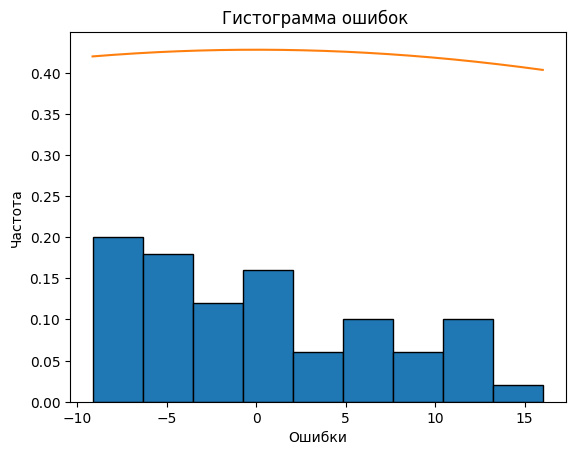

In [137]:
h = 2.8
bin=np.arange(np.min(mistakes), np.max(mistakes) + h, h)
print(bin)
weights = [1/(len(mistakes)) for _ in mistakes]
plt.hist(mistakes, bins=bin, edgecolor='black',weights =weights)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), 0, s) * len(mistakes))
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()

Видно, что выдвинутая гипотеза не соответствует действительности

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $\left( \beta_0,\beta_1 \right)$ (вычислить его полуоси).

$\psi=C^T\beta$

Возьмем $C_1=(1\space0),C_2=(0\space1)$ и $C_3=\begin{pmatrix}
 1& 0 \\
 0& 1
\end{pmatrix}$

Тогда $\psi_1=C_1^T\beta=\beta_0,\psi_2=C_2^T\beta=\beta_1$ и $\psi_3=C_3^T\beta=\begin{pmatrix}
 \beta_0\\
\beta_1
\end{pmatrix}$

$\widehat{\psi_1}=C_1^T\widehat{\beta}=\widehat{\beta_0},\widehat{\psi_2}=C_2^T\widehat{\beta}=\widehat{\beta_1}$ и $\widehat{\psi_3}=C_3^T\widehat{\beta}=\begin{pmatrix}
 \widehat{\beta_0}\\
\widehat{\beta_1}
\end{pmatrix}$

In [138]:
psi_1=beta_0;
psi_2=beta_1;
psi_3=np.array([[beta_0], [beta_1]])
x_alpha1=t.ppf(1-alpha/2,n-r)
x_alpha2=x_alpha1
x_alpha3=f.ppf(1-alpha/2,2,n-r)
C1=np.array([1,0])
transposed_C1 = C1.T
b1=np.dot(np.dot(transposed_C1,(np.linalg.inv(result))),C1)
C2=np.array([0,1])
transposed_C2 = C2.T
b2=np.dot(np.dot(transposed_C2,(np.linalg.inv(result))),C2)
C3=np.array([[1,0],[0,1]])
transposed_C3 = C3.T
b3=np.dot(np.dot(transposed_C3,(np.linalg.inv(result))),C3)
print(b3)
dif=x-psi_3;
transposed_dif = dif.T
print('Интервал для beta_0:',psi_1-x_alpha1*np.sqrt(b1)*np.sqrt(s),psi_1+x_alpha1*np.sqrt(b1)*np.sqrt(s))
print('Интервал для beta_1:',psi_2-x_alpha2*np.sqrt(b2)*np.sqrt(s),psi_2+x_alpha2*np.sqrt(b2)*np.sqrt(s))


[[ 0.06520059 -0.0115899 ]
 [-0.0115899   0.00297177]]
Интервал для beta_0: [7.27118189] [11.80213282]
Интервал для beta_1: [-0.58008594] [0.38723602]


$\left[7.27118189, 11.80213282\right] \ni \beta_0$

$\left[-0.58008594, 0.38723602\right] \ni \beta_1$

In [139]:
x_alp=ss.f.ppf(1-alpha,2, n-r)
print(x_alp)

1.6646290755148485


$ \left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \end{pmatrix}\right)^\intercal B^{-1}\left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \end{pmatrix}\right) \leq qs^2x_α $

$ \left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} 9.53665736 \\ -0.09642496  \end{pmatrix}\right)^\intercal \begin{pmatrix} 0.06520059 & -0.0115899 \\ -0.0115899 &  0.00297177  \end{pmatrix}\left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} 9.53665736 \\ -0.09642496  \end{pmatrix}\right) \leq 2 \cdot 46.61819544229817\cdot 1.6646290755148485 $

$0.065x^2-1.245x+5.95+0.023xy-0.219y+0.0029y^2 \leq 155.203 $

### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

$RSS(\beta_H)=\sum_{i=1}^{n}(Y_i-\beta_0^H)^2\to min_{\beta_H}$

$\sum_{i=1}^{n}(Y_i-\beta_0^H)=0$

$\widehat{\beta_0^H}=\sum_{i=1}^{n}(Y_i)/n$

In [140]:
beta_0s = sum(Y)/len(Y)
mistakes_s=y - beta_0
RSS_s = np.sum((mistakes_s)**2)
F=(RSS_s-RSS)/(RSS/(n-2))
x_a=ss.f.ppf(1-alpha,2, n-r)
print('F:',F)
print('x_a:',x_a)

F: 0.2187913408090166
x_a: 1.6646290755148485


$\mathbb{F} < x_{\alpha}$ значит гипотеза принимается

### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Регрессионную модель переменной Y по переменной X можно сформулировать в следующем виде:

$Y=X^T\beta+\varepsilon=\beta_0+\beta_1x+\beta_2x^2+\varepsilon$

In [145]:
X2 = np.vstack([np.ones_like(x),x,x**2]) #приведем матрицу к виду [[1,1,...,1][x1,x2,...,x50][x1^2,x2^2,...,x50^2]
transposed_X2 = X2.T
result = np.dot(X2, transposed_X2)
determinant = np.linalg.det(result)
print('Определитель X*X^T:',determinant)#найдем определитель, чтобы убедиться,что у матрицы есть обратная
Y2 = y.reshape(50, 1)
beta=np.dot(np.dot(np.linalg.inv(result),X2),Y2)#(X*X^T)^(-1)*X*Y
beta_0=beta[0];
beta_1=beta[1];
beta_2=beta[2];
print('beta_0:',beta_0)
print('beta_1:',beta_1)
print('beta_2:',beta_2)

Определитель X*X^T: 31591511.9999999
beta_0: [9.6097579]
beta_1: [-0.16406464]
beta_2: [0.00869162]


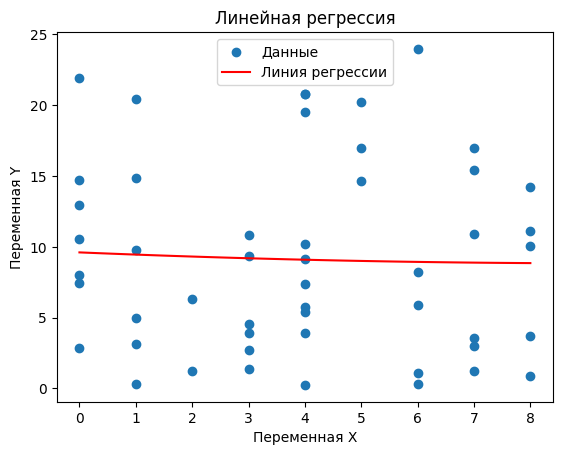

In [146]:
y_values2 = beta_0 + beta_1 * x_values + beta_2 * x_values* x_values

plt.scatter(x, y, label='Данные')
plt.plot(x_values, y_values2, color='red', label='Линия регрессии')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Найдем несмещенную оценку дисперсии по формуле: $ s^2=\frac{RSS(β)}{n-r} $

,где $RSS(β)=\sum_{i=1}^{50}\left( Y_i -\beta_0-\beta_1X_i-\beta_2(X_i)^2\right)^2$ 

In [147]:
mistakes2=y - beta_0 - beta_1*x- beta_2*(x**2)
RSS2 = np.sum((mistakes2)**2)
r=np.linalg.matrix_rank(X);
n=len(x)
s=RSS2/(n-r)
print('s:',s)

s: 46.615240317946785


[-9.15438488 -6.35438488 -3.55438488 -0.75438488  2.04561512  4.84561512
  7.64561512 10.44561512 13.24561512 16.04561512]


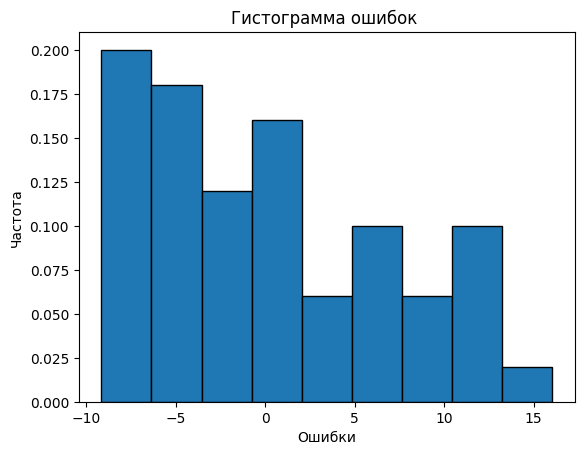

In [148]:
h = 2.8
bin=np.arange(np.min(mistakes2), np.max(mistakes2) + h, h)
print(bin)
weights = [1/(len(mistakes2)) for _ in mistakes]
plt.hist(mistakes2, bins=bin, edgecolor='black',weights =weights)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()

Выделим новые интервалы,чтобы в каждый попадало не менее 5 ошибок:

$I_1=(-\infty ;-6.34023239];I_2=(-6.34023239 ;-3.54023239 ];I_3=(-3.54023239  ;-0.74023239];$

$I_4=(-0.74023239;2.05976761 ];I_5=(2.05976761;7.65976761];I_6=(7.65976761;\infty)$

Абсолютные частоты:
$\nu_1=0.2;\nu_2=0.18;\nu_3=0.12;\nu_4=0.16;\nu_5=0.16;\nu_6=0.18$


Абсолютные частоты:
$\nu_1=10;\nu_2=9;\nu_3=6;\nu_4=8;\nu_5=8;\nu_6=9$


Ожидаемые частоты $np_0i$: $np_{01}=22.295;np_{02}=1.191;np_{03}=1.196;np_{04}=1.197;np_{05}=2.381;np_{06}=21.737$

$\chi^2 \approx 136.67$

$x_{\alpha} \approx 5.99$

$\chi^2 > x_{\alpha_2}$ значит гипотеза отвергается

In [149]:
k_statistic, p_value = kstest(mistakes2, 'norm')
x_al=ss.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes2))
print('Статистика Колмогорова:',k_statistic)
print('x_al:',x_al)

Статистика Колмогорова: 0.4473578533845024
x_al: 0.1517096432224198


$\widehat{D_n} > x_{\alpha}$ значит гипотеза отвергается

[-9.14023239 -6.34023239 -3.54023239 -0.74023239  2.05976761  4.85976761
  7.65976761 10.45976761 13.25976761 16.05976761]


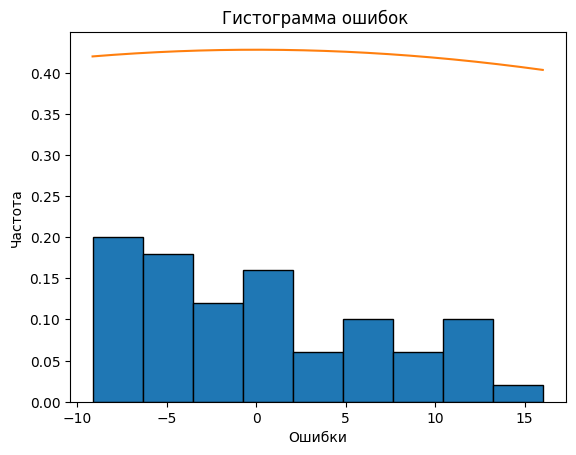

In [150]:
h = 2.8
bin=np.arange(np.min(mistakes), np.max(mistakes) + h, h)
print(bin)
weights = [1/(len(mistakes)) for _ in mistakes]
plt.hist(mistakes, bins=bin, edgecolor='black',weights =weights)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), 0, s) * len(mistakes))
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()

Видно, что выдвинутая гипотеза не соответствует действительности

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$. 

$\psi=C^T\beta$

Возьмем $C_1=(1\space0\space0),C_2=(0\space1\space0)$ и $C_2=(0\space0\space1)$

Тогда $\psi_1=C_1^T\beta=\beta_0,\psi_2=C_2^T\beta=\beta_1$ и $\psi_3=C_3^T\beta=\beta_2$

$\widehat{\psi_1}=C_1^T\widehat{\beta}=\widehat{\beta_0},\widehat{\psi_2}=C_2^T\widehat{\beta}=\widehat{\beta_1}$ и $\widehat{\psi_3}=C_3^T\widehat{\beta}=\widehat{\beta_1}$

In [151]:
psi_1=beta_0;
psi_2=beta_1;
psi_3=beta_2;
x_alpha1=t.ppf(1-alpha/2,n-r)
x_alpha2=x_alpha1
x_alpha3=x_alpha1
C1=np.array([1,0,0])
transposed_C1 = C1.T
b1=np.dot(np.dot(transposed_C1,(np.linalg.inv(result))),C1)
C2=np.array([0,1,0])
transposed_C2 = C2.T
b2=np.dot(np.dot(transposed_C2,(np.linalg.inv(result))),C2)
C3=np.array([0,0,1])
transposed_C3 = C3.T
b3=np.dot(np.dot(transposed_C3,(np.linalg.inv(result))),C3)
print
print('Интервал для beta_0:',psi_1-x_alpha1*np.sqrt(b1)*np.sqrt(s),psi_1+x_alpha1*np.sqrt(b1)*np.sqrt(s))
print('Интервал для beta_1:',psi_2-x_alpha2*np.sqrt(b2)*np.sqrt(s),psi_2+x_alpha2*np.sqrt(b2)*np.sqrt(s))
print('Интервал для beta_2:',psi_3-x_alpha3*np.sqrt(b3)*np.sqrt(s),psi_3+x_alpha3*np.sqrt(b3)*np.sqrt(s))

Интервал для beta_0: [6.76417867] [12.45533713]
Интервал для beta_1: [-1.82920625] [1.50107697]
Интервал для beta_2: [-0.19605283] [0.21343608]


$\left[6.76417867, 12.45533713\right] \ni \beta_0$

$\left[-1.82920625, 1.50107697\right] \ni \beta_1$

$\left[-0.19605283, 0.21343608\right] \ni \beta_2$

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить ее значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \psi = 0$

$RSS(\beta_H)=\sum_{i=1}^{n}(Y_i-\beta_0^H-\beta_1^Hx)^2\to min_{\beta_H}$

$\sum_{i=1}^{n}(Y_i-\beta_0^H)=0$

$\widehat{\beta^H}=\begin{pmatrix}\beta_0 \\ \beta_1\end{pmatrix}$

In [91]:
F2=(RSS-RSS2)/(RSS2/(n-2))
x_a=ss.f.ppf(1 - alpha,3, n-r)
print('F:',F)
print('x_a:',x_a)

F: 0.2834910613693215
x_a: 1.607214475158665


$\mathbb{F} < x_{\alpha}$ значит гипотеза принимается

## Выводы

В ходе данной практической работы удалось ознакомиться с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.